In [17]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from adtk.data import validate_series
from adtk.detector import LevelShiftAD
from adtk.detector import SeasonalAD

In [5]:
#import data set, dataset was downloaded from Kaggle:https://www.kaggle.com/datasets/hamidrezabakhtaki/fmcg-export-sale
df=pd.read_csv("ExportSales.csv",index_col=1,parse_dates=True)
df.head(2)

,ID,Category,Invoice Number,Product Code,Customer Code,Destenation,QTY,Total Price,Destination full name
Date,,,,,,,,,
2019-04-28,2529604,Category5,267,30011006,612,IRQ,750,3334.8225,Iraq
2019-04-29,2529605,Category5,302,30011006,514,BHR,400,3032.8240,Bahrain


In [6]:
#Sort index to be sure that dates are increasing, change data sequence to monthly basis,check if index is correct
df=df.sort_index(ascending=True)
df=df.resample('M').sum()
df.index

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31',
               '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31'],
              dtype='datetime64[ns]', name='Date', freq='M')

In [7]:
#Selection needed columns
df_ts = df[["QTY"]]

In [8]:
# Validate the data
data = validate_series(df_ts)
data = data.interpolate()

In [11]:
# Create an instance of the LevelShiftAD detector
detector = LevelShiftAD(window=12)
detector.fit(data)

In [15]:
#Generate anomaly scores for data
anomaly_scores = detector.predict(data)

[<AxesSubplot:>]

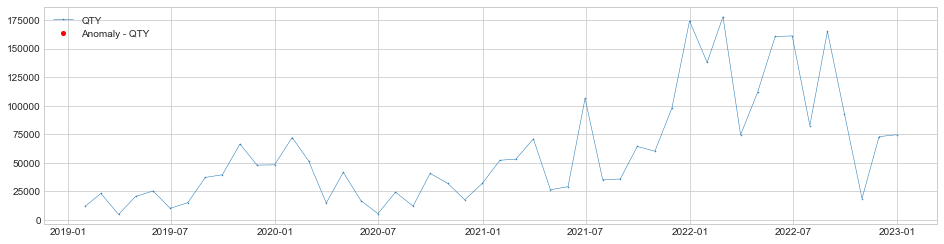

In [16]:
#Plot anomaly
plot(df_ts, anomaly_scores, ts_markersize=1, anomaly_color='red', anomaly_tag="marker")